## VALIDAÇÃO DE MODELOS PARA CLUSTERIZAÇÃO 
- Autor(a) - Patrícia ferreira da ilva
- Tutor - Luiz Fernando de Frias 

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs, make_moons
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import SilhouetteVisualizer

from sklearn.cluster import DBSCAN

## 1.  Escolha da base de dados 
### 2. Justificativa 
- Base sobre preços de casas 
- Agrupar preços de casas por  região 

In [2]:
df = pd.read_csv('housing.csv')
df.reset_index(inplace=True, drop=True)


In [3]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## 3. Gráfico de faixa dinâmica  

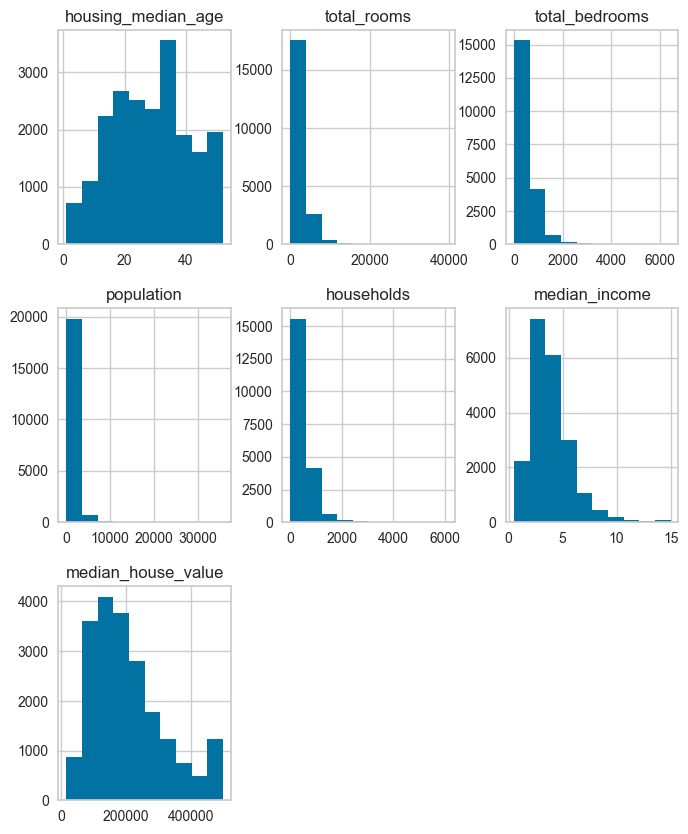

In [4]:
data = df.drop(['ocean_proximity','longitude','latitude'],axis=1)
p = data.hist(figsize = (8,10))

## - O que deve ser feito com os dados antes da etapa de clusterização?
#### - Normalizar os dados, transformar números floant em inteiros 
#### -  verificar e corrigir valores nulos 


# EDA 

## Dicionario de dados
- Longitude
- latitude 
- housing_median_age =  idade mediana da habitação
- total_rooms = quartos totais
- total_bedrooms = total quartos de dormir
- population = população
- households = famílias
- median_income = renda mediana
- median_house_value = valor mediano da casa
- proximidade do oceano

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [7]:
data.shape

(20640, 7)

In [8]:
# verificando valores nulos 
print(data.isnull().sum())

housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64


In [9]:
# Corrigindo valores nulos 
data.dropna(inplace=True)


In [10]:
print(data.isnull().sum())

housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


In [11]:
# tranformando dados float em int
data['housing_median_age'] = data['housing_median_age'].astype('int')
data['total_rooms'] = data['total_rooms'].astype('int')
data['total_bedrooms'] = data['total_bedrooms'].astype('int')
data['population'] = data['population'].astype('int')
data['households'] = data['households'].astype('int')
data['median_income'] = data['median_income'].astype('int')
data['median_house_value'] = data['median_house_value'].astype('int')

In [12]:
data

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,41,880,129,322,126,8,452600
1,21,7099,1106,2401,1138,8,358500
2,52,1467,190,496,177,7,352100
3,52,1274,235,558,219,5,341300
4,52,1627,280,565,259,3,342200
...,...,...,...,...,...,...,...
20635,25,1665,374,845,330,1,78100
20636,18,697,150,356,114,2,77100
20637,17,2254,485,1007,433,1,92300
20638,18,1860,409,741,349,1,84700


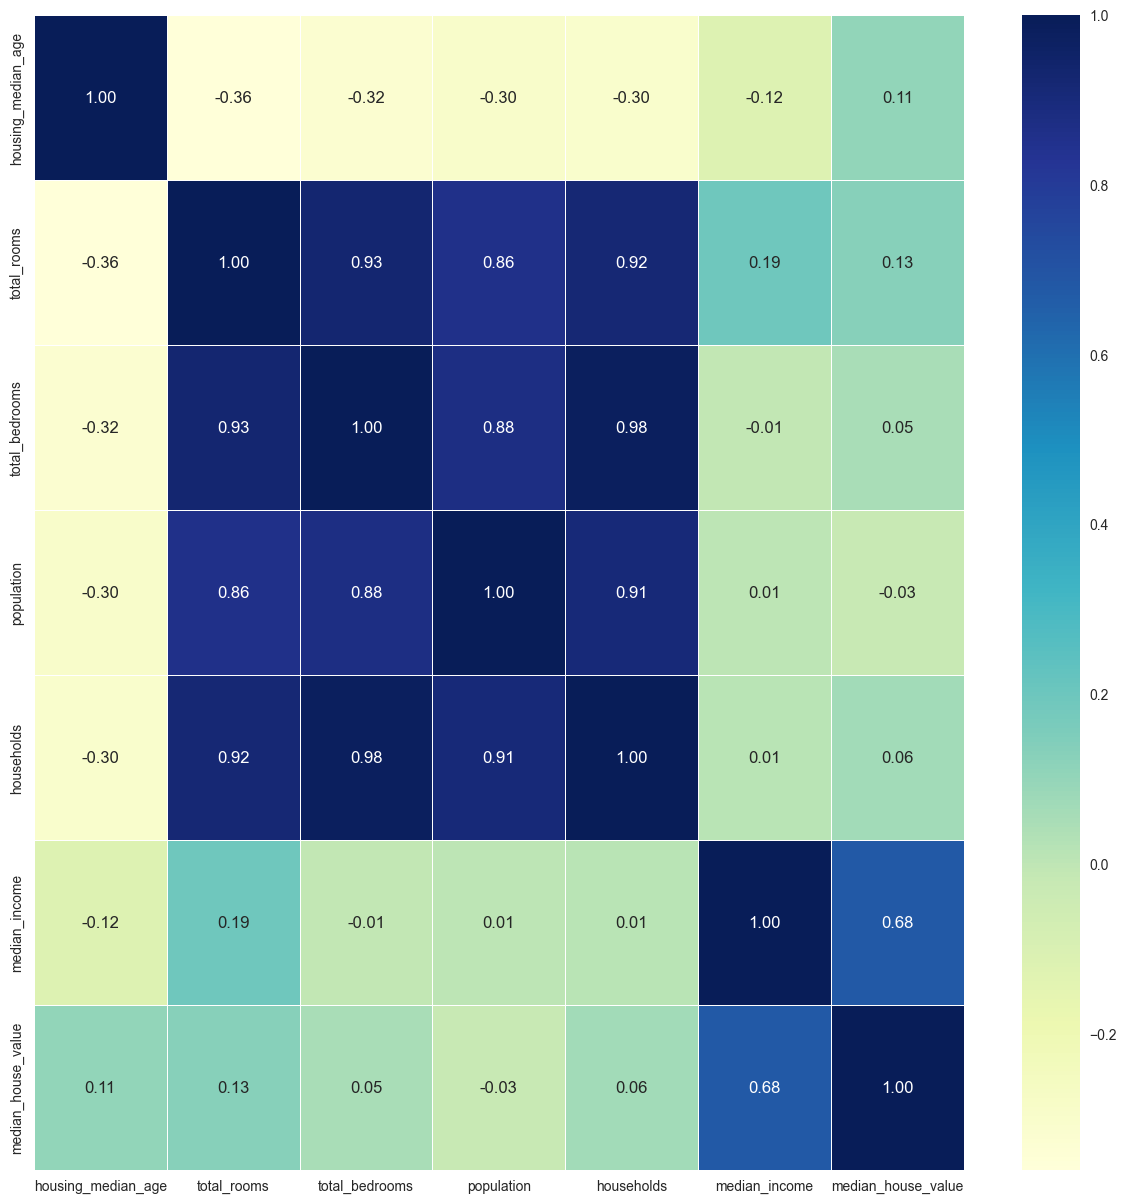

In [13]:
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
#ax.set_ylim(bottom + 0.5, top - 0.5)

## Normalização dos dados

In [14]:
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer


In [15]:
x = data.values
x

array([[    41,    880,    129, ...,    126,      8, 452600],
       [    21,   7099,   1106, ...,   1138,      8, 358500],
       [    52,   1467,    190, ...,    177,      7, 352100],
       ...,
       [    17,   2254,    485, ...,    433,      1,  92300],
       [    18,   1860,    409, ...,    349,      1,  84700],
       [    16,   2785,    616, ...,    530,      2,  89400]])

In [16]:
scaler = StandardScaler()
X = scaler.fit_transform(x)
X

array([[ 0.98216331, -0.8038126 , -0.97032521, ..., -0.97683327,
         2.38510785,  2.12881864],
       [-0.60621017,  2.0421302 ,  1.34827594, ...,  1.67037262,
         2.38510785,  1.31362603],
       [ 1.85576873, -0.53518928, -0.82556097, ..., -0.84342665,
         1.86735089,  1.25818254],
       ...,
       [-0.92388486, -0.17504183, -0.12547157, ..., -0.17377773,
        -1.23919082, -0.99247676],
       [-0.84446619, -0.35534437, -0.30583358, ..., -0.39350628,
        -1.23919082, -1.05831591],
       [-1.00330353,  0.06795473,  0.18541559, ...,  0.07995643,
        -0.72143387, -1.01759959]])

# Clusterização
- K-Médias

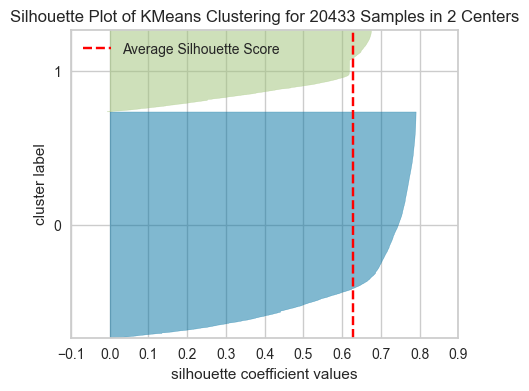

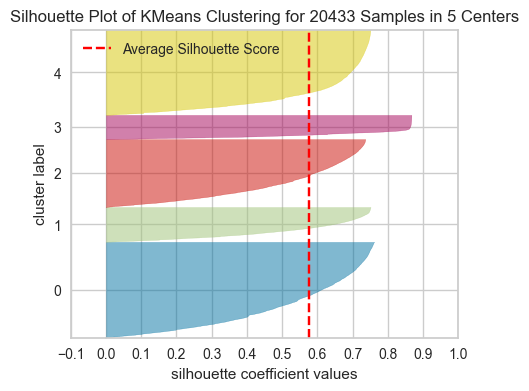

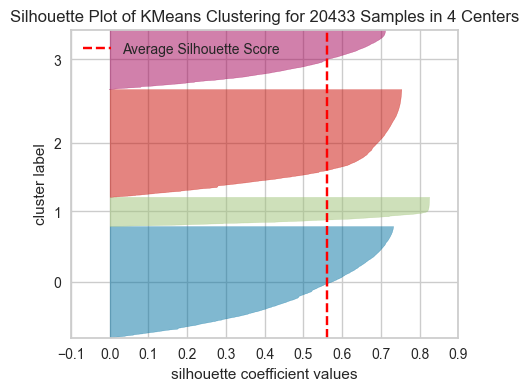

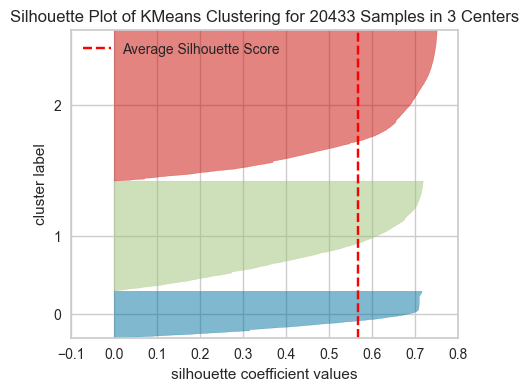

In [17]:
#indice de silhueta 
km = KMeans(n_clusters=2).fit(x)

fig, ax = plt.subplots(1, 1, figsize=(5, 4))

visualizer = SilhouetteVisualizer(km, ax=ax, colors='yellowbrick')
visualizer.fit(x)
visualizer.show();



km = KMeans(n_clusters=5).fit(x)

fig, ax = plt.subplots(1, 1, figsize=(5, 4))

visualizer = SilhouetteVisualizer(km, ax=ax, colors='yellowbrick')
visualizer.fit(x)
visualizer.show();


km = KMeans(n_clusters=4).fit(x)

fig, ax = plt.subplots(1, 1, figsize=(5, 4))

visualizer = SilhouetteVisualizer(km, ax=ax, colors='yellowbrick')
visualizer.fit(x)
visualizer.show();


km = KMeans(n_clusters=3).fit(x)

fig, ax = plt.subplots(1, 1, figsize=(5, 4))

visualizer = SilhouetteVisualizer(km, ax=ax, colors='yellowbrick')
visualizer.fit(x)
visualizer.show();


## Justificar o número de clusters escolhidos 
A principal diferença entre os gráficos acima está no tamanho da silhueta de cada gráfico, os gráfico apresenta tamanhos semelhantes entre si, onde com cluster = 2 possui maior discrepância entre si, ja o com cluster = 4 estão com tamanhos semalhantes entre si, o que surge ser a melhor escolha para a quantidade de clusters.

### 1.  K-Médias

In [18]:
kmeans=KMeans(n_clusters=4,random_state=10) #init='k-means++',
y=kmeans.fit_predict(X)
y

array([0, 2, 0, ..., 1, 1, 1])

In [19]:
#data['Cluster']=y
#data.head(10)
data['Cluster']=y

In [20]:
data.groupby('Cluster').mean()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
Cluster,,,,,,,
0,31.321979,2395.773303,407.546145,1028.309321,389.558343,5.712083,367524.485846
1,31.752739,1651.310005,361.360072,1006.878225,336.333182,2.528203,148116.613581
2,20.166332,4202.829654,890.201561,2309.793980,819.240134,3.206466,194148.749610
3,13.998208,11422.304659,2214.596774,5676.596774,2012.905018,3.965950,220898.788530


In [21]:
### Clusters 0,1,2 e 3
df_0=data[data['Cluster']==0]
df_1=data[data['Cluster']==1]
df_2=data[data['Cluster']==2]
df_3=data[data['Cluster']==3]

In [22]:
df_0.head(3)


,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Cluster
0,41,880,129,322,126,8,452600,0
2,52,1467,190,496,177,7,352100,0
3,52,1274,235,558,219,5,341300,0


In [23]:
df_1.head(3)


,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Cluster
5,52,919,213,413,193,4,269700,1
6,52,2535,489,1094,514,3,299200,1
7,52,3104,687,1157,647,3,241400,1



## 2. DBScan

In [71]:
from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import SimpleImputer
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from DBCV import DBCV
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import euclidean


In [72]:



num_pipeline = Pipeline(
    [
      ("imputer", SimpleImputer(strategy="median")),
    ]
)
df_prepared = num_pipeline.fit_transform(x)
df_prepared = preprocessing.normalize(df_prepared)

In [73]:
from sklearn.decomposition import PCA 

pca = PCA(n_components = 2) 
df_principal = pca.fit_transform(df_prepared) 
df_principal = pd.DataFrame(df_principal) 
df_principal.columns = ['P1', 'P2'] 
df_principal

,P1,P2
0,-0.017062,-0.000235
1,0.001782,-0.004042
2,-0.014778,-0.000756
3,-0.014986,-0.000337
4,-0.014079,-0.000837
...,...,...
20428,0.005517,-0.001245
20429,-0.008732,-0.000447
20430,0.008321,-0.002719
20431,0.005041,-0.003352


In [88]:

db=DBSCAN(eps=0.5,min_samples=10).fit(data)
labels=db.labels_

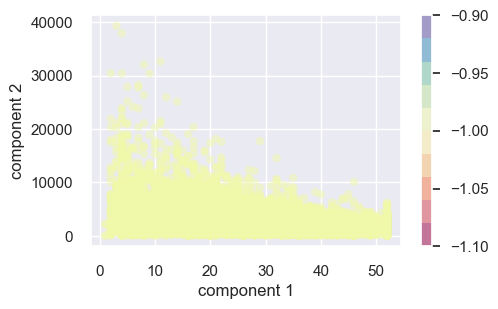

In [90]:
plt.scatter(x[:, 0], x[:, 1],
            c= labels.astype(float), edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

# Compare os dois resultados, aponte as semelhanças e diferenças e interprete
K meas recuperou 4 grupos distintos já o dbscan não conseguiu recuperar
##### K meas 
* facil de ser implementado e interpretado 
* é mais escalavel mais eficiente
*requer que o usuario diga inicialmente o n° de clusters 
*sensivel a outliers

#### DBScan
* simples e facil de ser implementado 
* não requer que o usuario diga p n° de cluster 
*não é sensivel a outlires 
 
K meas é um algoritmo de aprendizado de máquina surpervisionados, ele identifica o número de k centróidese, em seguida
aloca todos os pontos de dados para o cluster mais próximo, mantendo os centróides o menor possível.
DVScan- é baseado em densidade de aplicativos com ruido, ele define os clusters como o maior conjunto de pontos densamente 
conectados, pode dividir regiões com densidade alta o suficiente em clusters e pode encontrar clusters de forma arbitrárias 
em banco de dados espaciais ruidosos.

    

## 3. Escolha mais duas medidas de valição para comparar com o indice de silhueta

- Dendograma
- KElbowVisualizer


* ### Comparação
- método da silhueta, é analisado um coeficiente resultante de um cálculo da distância entre os centróides, levando em consideração o agrupamento dos dados que os cerca, observando os graficos, o que melhor represnta é o gráfico com k= 4, estão com tamanhos de silhuenta mais semelhantes entre si.


- O dendrograma é um diagrama de árvore que exibe os grupos formados por agrupamento de observações em cada passo e em seus níveis de similaridade, observando o gráfico ele agrupa os dados em quantro grandes grupos.



- Metodo do cotovelo KElbowVisualizer, temos o valor de quão próximo eles são uns dos outros, observando o grafico, ele aponta paraum numero ideal de 3 ou 4 clustrs, sendo k =4 com melhor tempo de resposta para o algoritmo.



- Para o BDScan, a medida de validação melhor é o DBCV pois funciona para algoritmos de agrupamentos baseados em desidade precisamente porque leva em cosideração o ruído e captura a propriedade de forma dos agrupamentos por meio de densidadese não por distância.
 
##### Analisando todos os resultados o melhor K para o olgoritmo seria K = 4 

In [32]:
import scipy.cluster.hierarchy as sch


In [46]:
df=data.drop(['Cluster'],axis=1)


Text(0, 0.5, 'Euclidean\xa0Distance')

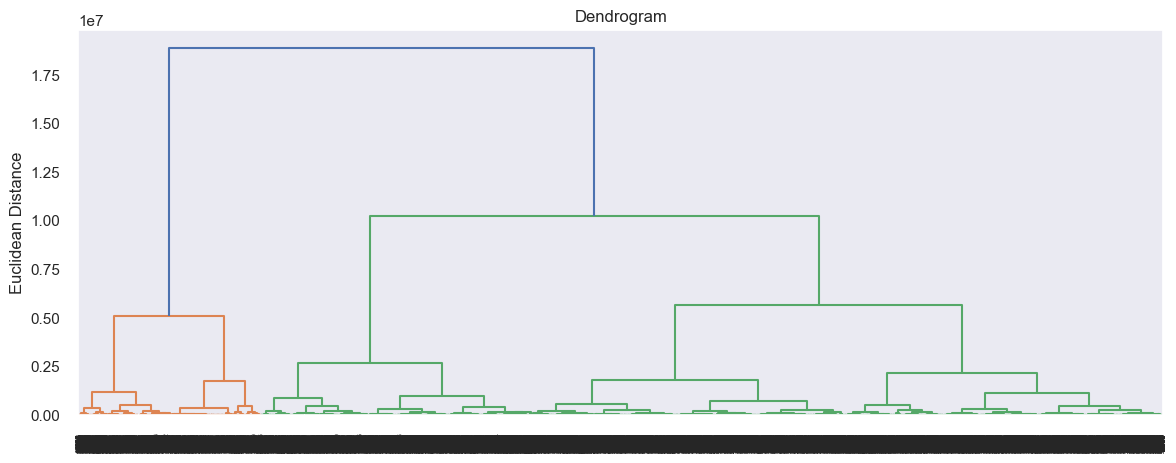

In [44]:
plt.figure(figsize=(14, 5))
plt.grid(False)
dendrogram = sch.dendrogram(sch.linkage(df, method='ward')) #, labels=df.index
plt.title('Dendrogram')
plt.ylabel('Euclidean Distance')

In [36]:

Wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=9)
    kmeans.fit(x)
    Wcss.append(kmeans.inertia_)
print(Wcss)

[272394861195556.44, 85139069740659.72, 38733675242234.86, 21110587440421.906, 12267227603554.574, 8749515372088.926, 6469357463635.234, 4917161410363.13, 3773044065549.6025, 3138962515085.4595]


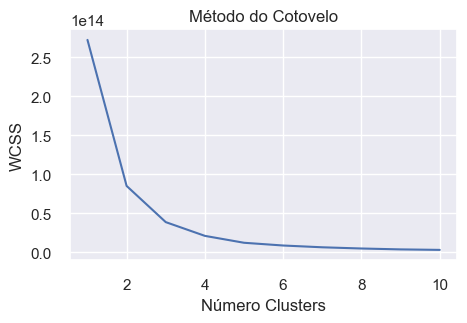

In [37]:
sns.set()
plt.plot(range(1,11),Wcss)
plt.title('Método do Cotovelo')
plt.xlabel('Número Clusters')
plt.ylabel('WCSS')
plt.show()

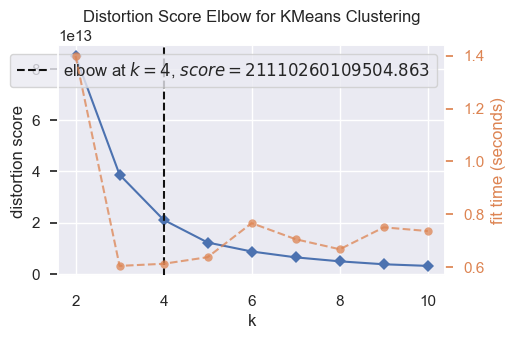

In [45]:
from yellowbrick.cluster import KElbowVisualizer
el = KElbowVisualizer(KMeans(), k=10)
el.fit(df)
el.show();

### 4.  A silhueta é um índice indicado para escolher o número de clusters para o algoritmo DBScan?
Resp--- Quando não há rótulos disponíveis, é comum escolher uma métrica objetiva, como o Silhouette Score , para avaliar e, em seguida, decidir sobre o resultado final do agrupamento. O Silhouette Score mede a coesão e a separação do cluster com um índice entre -1 a 1. Ele NÃO leva em consideração o ruído no cálculo do índice e faz uso de distâncias. A distância não é aplicável para uma técnica baseada em densidade. Não incluir um ruído no cálculo da métrica objetiva viola uma suposição inerente ao agrupamento baseado em densidade.

Isso significa que o Silhouette Score e índices semelhantes são inadequados para medir técnicas baseadas em densidade como o DBScan.


# Medidas de similaridade

1. Um determinado problema, apresenta 10 séries temporais distintas. Gostaríamos de agrupá-las em 3 grupos, de acordo com um critério de similaridade, baseado no valor máximo de correlação cruzada entre elas. Descreva em tópicos todos os passos necessários.





- pegar ambas  e começar a dar um lag nas series, temos uma unidade de tempo anda com ele, calcular a correlação de pearson entre elas, faz um shift e calcula a correlação de novo e de novo e de novo.....ela cria uma curva que mostra a correlação de person, onde iremos saber o ponto ideal da sincronia e onde esta adiantando ou atrasado.












2. Para o problema da questão anterior, indique qual algoritmo de clusterização você usaria. Justifique

- KNN, ele é utilizado para fazer estimativas de densidade, permitindo verificar quais são as regiões de alta e baixa densidade, retornando um indice com valor de -1 a 1.

- Algoritmo dtwclust, por que ele utiliza técnicas relacionadas à distância do dynamic, utiliza implementações de agruppamentos particional, hierárquico e pode ser facilmente estendida com medidas de distância personalizadas e definições de centróides. 



3. Indique um caso de uso para essa solução projetada.
- Pode- se usar esse caso para clusterizar bases que tenha relação com o tempo, por ex: temperatura anual, tempo de compra e venda....

4. Sugira outra estratégia para medir a similaridade entre séries temporais. Descreva em tópicos os passos necessários.




- similaridade=  agrupar o moviento dela de acordo com o indice temporal(movemento da temperatura ao logo do tempo, subir e descer) essa é a similaridade com os outros grupos (sincronia) utiliza correlação de pearson para calcular similaridadevalor maximo é entre -1 e 1. 